## 1) Importing Important Modules and reading the Data

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/kaggle/input/car-price-predictionused-cars/car data.csv


In [2]:
file_path = '/kaggle/input/car-price-predictionused-cars/car data.csv'
df = pd.read_csv(file_path)

## 2) Data Exploration

here we are going to see our dataset properly, and if it has any missing values or any values which isn't required by us

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


as we can see above there aren't any columns which have missing values, it is a good sign for us

## 2) Data Preprocessing

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Feature Scaling: we are apply feature scaling here, to get all the values near each other

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['Year', 'Present_Price', 'Driven_kms', 'Selling_Price']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,0.733333,0.093123,0.057109,0.053053,Petrol,Dealer,Manual,0
1,sx4,0.666667,0.133238,0.099913,0.085085,Diesel,Dealer,Manual,0
2,ciaz,0.933333,0.204871,0.103273,0.012813,Petrol,Dealer,Manual,0
3,wagon r,0.533333,0.078797,0.041504,0.009409,Petrol,Dealer,Manual,0
4,swift,0.733333,0.128940,0.070980,0.083984,Diesel,Dealer,Manual,0


One Hot Encoding: converting into numerical values

In [ ]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [14]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,ritz,0.733333,0.093123,0.057109,0.053053,0,False,True,False,True
1,sx4,0.666667,0.133238,0.099913,0.085085,0,True,False,False,True
2,ciaz,0.933333,0.204871,0.103273,0.012813,0,False,True,False,True
3,wagon r,0.533333,0.078797,0.041504,0.009409,0,False,True,False,True
4,swift,0.733333,0.128940,0.070980,0.083984,0,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
296,city,0.866667,0.269341,0.122237,0.067043,0,True,False,False,True
297,brio,0.800000,0.111748,0.060468,0.119119,0,False,True,False,True
298,city,0.400000,0.093123,0.115735,0.175043,0,False,True,False,True
299,city,0.933333,0.326648,0.131990,0.017017,0,True,False,False,True


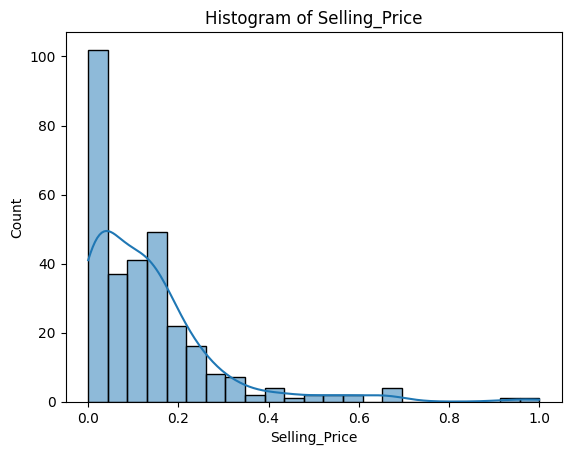

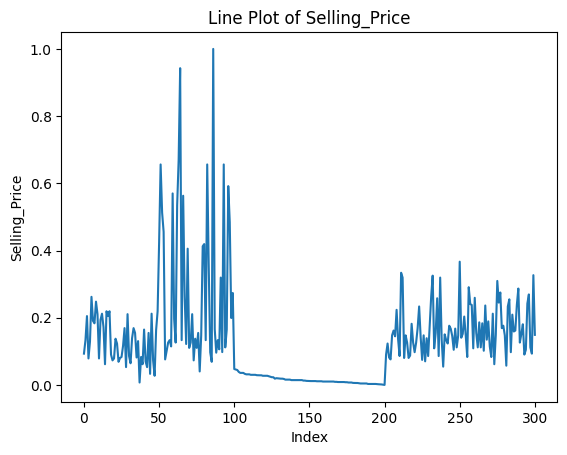

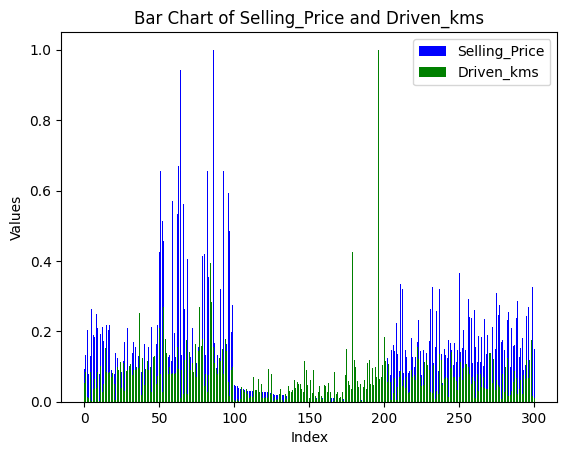

In [21]:
# Histogram
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Histogram of Selling_Price')
plt.show()

# Line plot
plt.plot(df['Selling_Price'])
plt.title('Line Plot of Selling_Price')
plt.xlabel('Index')
plt.ylabel('Selling_Price')
plt.show()

# Bar chart
plt.bar(df.index, df['Selling_Price'], label="Selling_Price", color='b', width=0.5)
plt.bar(df.index, df['Driven_kms'], label="Driven_kms", color='g', width=0.5)
plt.legend()
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Bar Chart of Selling_Price and Driven_kms')
plt.show()

In [ ]:
df = df.drop('Car_Name', axis=1)

In [34]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,0.733333,0.093123,0.057109,0.053053,0,False,True,False,True
1,0.666667,0.133238,0.099913,0.085085,0,True,False,False,True
2,0.933333,0.204871,0.103273,0.012813,0,False,True,False,True
3,0.533333,0.078797,0.041504,0.009409,0,False,True,False,True
4,0.733333,0.128940,0.070980,0.083984,0,True,False,False,True


## 3) Data Splitting
Now finally our data looks better, and we can seperate our data into 3 different sets, training, validation, test set

In [41]:
X = df.drop(['Selling_Price'], axis=1)
Y = df['Selling_Price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

## 4) Model Training 

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Model selection
model = RandomForestRegressor(random_state=42)

In [43]:
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_validate)
mae = mean_absolute_error(Y_validate, y_pred)
mse = mean_squared_error(Y_validate, y_pred)
r2 = r2_score(Y_validate, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.024009789875835727
Mean Squared Error: 0.003448426778447363
R-squared: 0.8994618001977672


### Interpretation:
### - The Mean Absolute Error (MAE) represents the average absolute difference between predicted and actual values.
### - The Mean Squared Error (MSE) represents the average squared difference between predicted and actual values.
### - The R-squared (R2) value measures the proportion of variance in the dependent variable explained by the model.
###   A higher R2 indicates a better fit.

### These metrics give us an overall understanding of how well the model is performing on unseen data.

## 5) HyperParameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

# Example grid search for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### 6) Prediction

In [47]:
new_predictions = model.predict(X_test)
y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.021917938841655323
Mean Squared Error: 0.0014245337051393045
R-squared: 0.9246775658473778


### 7) Results Interpretation
After training and evaluating the model, let's interpret the results and analyze the importance of each feature
 in predicting the car price. RandomForestRegressor provides feature importances that help us understand which
 features are more influential in determining the selling price.

Feature Importances:
                   Feature  Importance
1            Present_Price    0.866524
0                     Year    0.060583
2               Driven_kms    0.041711
7      Transmission_Manual    0.016706
5         Fuel_Type_Petrol    0.005883
4         Fuel_Type_Diesel    0.005773
6  Selling_type_Individual    0.002754
3                    Owner    0.000065


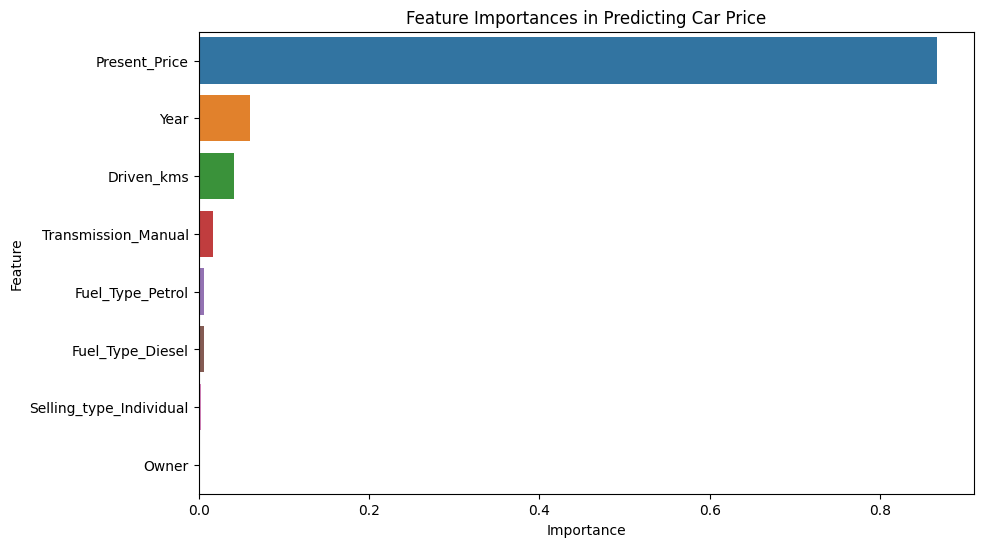

In [48]:
# Feature Importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Visualize the Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Predicting Car Price')
plt.show()

### 8) Documentation and Reporting

1. **Data Exploration:**
   - Explored the dataset, checking for missing values, and summarizing key statistics.

2. **Data Preprocessing:**
   - Applied feature scaling and one-hot encoding for numerical and categorical variables.

3. **Data Splitting:**
   - Divided the dataset into training, validation, and test sets.

4. **Model Training:**
   - Selected RandomForestRegressor and trained it on the training set.

5. **Model Evaluation:**
   - Evaluated the model on the validation set using metrics like MAE, MSE, and R-squared.

6. **Hyperparameter Tuning:**
   - Conducted a grid search to optimize model hyperparameters.

7. **Prediction:**
   - Made predictions on the test set and assessed model performance.

8. **Results Interpretation:**
   - Analyzed feature importances to identify key factors influencing car prices.

9. **Summary Metrics:**
   - MAE: Mean Absolute Error
   - MSE: Mean Squared Error
   - R-squared: Coefficient of determination
